# Install Relevant Libraries required for the Chatbot
* LangGraph
* LangSmith
* Langchain
* Langchain_groq
* Langchain_community

In [1]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [7]:
from google.colab import userdata
groq_api_key =userdata.get('groq_api_key')
langsmith =userdata.get('LANGSMITH_API_KEY')

In [9]:
import os
# CourseLanggraph --> project name

os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [11]:
from langchain_groq import ChatGroq # Because we need to use the ChatGroq open source models


In [12]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7a85af09b520>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7a85af0990c0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

# Start Building Chatbot Using LangGraph

In [13]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END   #StateGraph helps manage the entire state mangement
from langgraph.graph.message import add_messages #messages is keeping track of theinteraction with the state

In [15]:
# to control our entire state magement
class State(TypedDict):
  """
  # Message have the type "list". The `add_messages` function
  # in the anotation defines how this state key should be updated
  # (in this case, it appends messages to the list, rather  than overwriting them)
  * This add messages will be resposbible for adding or appending the messages to this list
  * it will not overide them.
  * the entire state mangement will be controlled as we keep on adding this messages
  """
  messages: Annotated[list, add_messages]

graph_builder=StateGraph(State)

In [16]:
graph_builder

In [17]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [18]:
# adding the chatbot to the graphbuilder

graph_builder.add_node("chatbot", chatbot)

In [19]:
graph_builder

In [20]:
# now we have created the graph_builder, we need to add the start & end nodes

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [23]:
graph = graph_builder.compile()

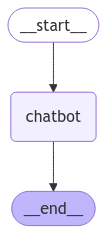

In [24]:
# to display this

from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [25]:
# assistant messages - are the messages coming from the LLM
"""
*** Break down of the code below:
* first the user gives an input
* if not quite
* then it goes to graph.stream to all the messages that the user has given
* then we get event.values
* from the event.values we get 2 important contents
* 1 is value of messages ( this should have user messages)
* 2 is value of messages dot content ( this should have LLM response)
"""
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("Good Bye")
    break

  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assitant:",value["messages"].content)


User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 5.6e-07, 'queue_time': 0.0036361099999999997, 'total_time': 0.027273287}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-31d1c5e8-5506-4641-8f61-f3c4cf027ed2-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})}])
content='Hello! 👋  How can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 5.6e-07, 'queue_time': 0.0036361099999999997, 'total_time': 0.027273287}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-3

User: what is generative AI


dict_values([{'messages': AIMessage(content='Generative AI is a fascinating branch of artificial intelligence that focuses on creating new content instead of just analyzing existing data. \n\nThink of it like this:\n\n* **Traditional AI** is great at recognizing patterns and making predictions based on the data it\'s been trained on. For example, it can identify a cat in a picture or predict the next word in a sentence.\n* **Generative AI** takes it a step further by learning the underlying structure of data and using that knowledge to generate brand new, original content. It\'s like teaching a computer to "imagine" and "create."\n\nHere are some key things to know about generative AI:\n\n**What it can do:**\n\n* **Text:** Write stories, poems, articles, dialogue, code, and even translate languages.\n* **Images:** Create realistic photographs, artwork, illustrations, and design assets.\n* **Audio:** Compose music, generate sound effects, and even mimic voices.\n* **Video:** Produce sho

User: q
Good Bye
